# Metodo dos Elementos Finitos

Universidade Federal Fluminense

Disciplina ministrada pelo Prof. Marco Ferro

<marco.ferro@uol.com.br>

Aluno Noé de Lima

<noe_lima@id.uff.br>

Este trabalho visa aplicar o MEF para resolver uma equação diferencial ordinária de segunda ordem.

Primeiro semestre de 2020

\vfill

In [1]:
%display latex
from numpy import array,zeros,math,linspace
from scipy.interpolate import interp1d
from scipy.linalg import solve
import matplotlib.pyplot as plt
plt.close('all') # apaga plotagens anteriores
latex.add_to_preamble('\\usepackage[english,brazil]{babel}')
!uname -a

Linux DESKTOP-CR7O8A2 4.19.104-microsoft-standard #1 SMP Wed Feb 19 06:37:35 UTC 2020 x86_64 x86_64 x86_64 GNU/Linux


\cleardoublepage

\tableofcontents

\cleardoublepage

## Exercício Teórico de MEF - 2 Elementos

Dada a Equação Diferencial Ordinária de Segunda Ordem abaixo:

\begin{equation}
    \frac{d^{2}u}{dx} - u = 0
\end{equation}

Sua solução analítica é:

\begin{equation}
    u\left(x\right) = \frac{e^{x}-e^{-x}}{e-e^{-1}}
\end{equation}

Este exercício consiste em resolver esta equação numericamente utilizando o Método dos Elementos Finitos com 2 elementos, a princípio sem a utilização de programação. O intervalo do domínio utilizado será $0 \le x \le 1$, e as condições de contorno são:

\begin{equation*}
    \left\{\begin{matrix}
        u\left(0\right) & = & 0 \\
        u\left(1\right) & = & 1
    \end{matrix}\right.
\end{equation*}

Assim, considerando 2 elementos, temos 3 nós. Cada elemento tem comprimento $h_{e}=\frac{1}{2}$.

### Elementos

Temos os seguintes nós nos elementos:

\begin{equation*}
    \left[\begin{matrix}
        u_{1} & = & 0 \\
        u_{2} & = & \frac{1}{2} \\
        u_{3} & = & 1
    \end{matrix}\right.
\end{equation*}

Portanto:

\begin{equation*}
    \left\{\begin{matrix}
        0 & \le & x_{1} & \le & \frac{1}{2} \\
        \frac{1}{2} & \le & x_{2} & \le & 0
    \end{matrix}\right.
\end{equation*}

Cada elemento tem comprimento $h_{e}=\frac{1}{2}$. As funções de interpolação serão, então:

\begin{equation*}
    \phi^{e}_{1}\left(x_{e}\right) = \frac{h_{e}-x_{e}}{h_{e}} =
    \frac{\frac{1}{2}-x_{e}}{\frac{1}{2}} = 1 - 2x_{e}
\end{equation*}

e

\begin{equation*}
    \phi^{e}_{2}\left(x_{e}\right) = \frac{x_{e}}{h_{e}} =
    \frac{x_{e}}{\frac{1}{2}} = 2x_{e}
\end{equation*}

#### Matriz de Rigidez dos Elementos

Os elementos da Matriz de Rigidez local $\mathbf{K}_{e}$ são:


\begin{equation*}
    K_{ij}^{e} = \int_{0}^{\frac{1}{2}}{\left(\frac{dN_{i}}{dx_{e}}\frac{dN_{j}}{dx_{e}}+N_{i}N_{j}\right)}dx_{e}
\end{equation*}

Assim:

In [2]:
x = var('x')
K_11 = integral((-2)*(-2)+(1-2*x)**2,x,0,1/2)
K_12 = integral((-2)*(2)+(1-2*x)*(2*x),x,0,1/2)
K_21 = integral((2)*(-2)+(2*x)*(1-2*x),x,0,1/2)
K_22 = integral((2)*(2)+(2*x)**2,x,0,1/2)
K_e = Matrix([[K_11,K_12],[K_21,K_22]])
print(K_e)

[  13/6 -23/12]
[-23/12   13/6]


Portanto, a Matriz de Rigidez Local fica:

\begin{equation*}
    \mathbf{K_{e}} =
    \left[\begin{matrix}
        \frac{13}{6} & \frac{-23}{12} \\
        \frac{-23}{12} & \frac{13}{6}
    \end{matrix}\right]
\end{equation*}

A Matriz de Rigidez Global sera:

\begin{equation*}
    \mathbf{K_{g}} =
    \left[\begin{matrix}
        K_{11} & K_{12} & 0\\
        K_{21} & K_{22}+K_{11} & K_{12}\\
        0 & K_{21} & K_{22}
    \end{matrix}\right]
\end{equation*}

Portanto:

In [3]:
K_g = Matrix([[K_11,K_12,0],[K_21,K_22+K_11,K_12],[0,K_21,K_22]])
print(K_g)

[  13/6 -23/12      0]
[-23/12   13/3 -23/12]
[     0 -23/12   13/6]


Ou seja,

\begin{equation*}
    \mathbf{K_{g}} =
    \left[\begin{matrix}
        \frac{13}{6} & -\frac{23}{12} & 0 \\
        -\frac{23}{12} & \frac{13}{3} & -\frac{23}{12} \\
        0 & -\frac{23}{12} & \frac{13}{6}
    \end{matrix}\right]
\end{equation*}

### Cálculo das Forças Nodais

#### Elemento 1

\begin{equation*}
    \begin{matrix}
        f_{1}^{1} & = & -N_{1}\frac{d\bar{u}\left(0\right)}{dx} & = -\frac{d\bar{u}\left(0\right)}{dx} \\
        f_{2}^{1} & = & 0 &
    \end{matrix}
\end{equation*}

#### Elemento 2

\begin{equation*}
    \begin{matrix}
        f_{1}^{2} & = & 0 & \\
        f_{2}^{2} & = & N_{2}\frac{d\bar{u}\left(1\right)}{dx} & = \frac{d\bar{u}\left(1\right)}{dx}
    \end{matrix}
\end{equation*}

Portanto,

\begin{equation*}
    \vec{f} =
    \left\{\begin{matrix}
        -\frac{d\bar{u}\left(0\right)}{dx} \\
        0 \\
        \frac{d\bar{u}\left(1\right)}{dx}
    \end{matrix}\right\}
\end{equation*}


### Equação final
Temos, portanto,

\begin{equation*}
    \mathbf{K}\cdot \vec{u} = \vec{f}
\end{equation*}

\begin{equation*}
    \left[\begin{matrix}
        \frac{13}{6} & -\frac{23}{12} & 0 \\
        -\frac{23}{12} & \frac{13}{3} & -\frac{23}{12} \\
        0 & -\frac{23}{12} & \frac{13}{6}
    \end{matrix}\right]
    \left\{\begin{matrix}
        u_{1} \\ u_{2} \\ u_{3}
    \end{matrix}\right\} =
    \left\{\begin{matrix}
        -\frac{d\bar{u}\left(0\right)}{dx} \\ 0 \\ \frac{d\bar{u}\left(1\right)}{dx}
    \end{matrix}\right\}
\end{equation*}

Ou,

\begin{equation*}
    \begin{matrix}
        2,167u_{1} & -1,917u_{2} & 0u_{3} & = & -\frac{d\bar{u}\left(0\right)}{dx}\\
        -1,917u_{1} & 4,334u_{2} & -1,917u_{3} & = & 0 \\
        0u_{1} & -1,917u_{2} & 2,167u_{3} & = & \frac{d\bar{u}\left(1\right)}{dx}
    \end{matrix}
\end{equation*}

Rearrumando temos a seguinte equação:

\begin{equation*}
    \left[\begin{matrix}
        1 & -\frac{23}{12} & 0 \\
        0 & \frac{13}{3} & 0 \\
        0 & -\frac{23}{12} & -1
    \end{matrix}\right]
    \left\{\begin{matrix}
        \frac{d\bar{u}\left(0\right)}{dx} \\ u_{2} \\ \frac{d\bar{u}\left(1\right)}{dx}
    \end{matrix}\right\} =
    -\left\{\begin{matrix}
        \frac{13}{6} \\ -\frac{23}{12} \\ 0
    \end{matrix}\right\}u_{1}
    -\left\{\begin{matrix}
        0 \\ -\frac{23}{12} \\ \frac{13}{6}
    \end{matrix}\right\}u_{3}
\end{equation*}

In [4]:
K = Matrix([[1,K_12,0],[0,K_22+K_11,0],[0,K_21,-1]])
f = -0*vector([K_11,K_21,0])-1*vector([0,K_12,K_22])
print("K' =\n", K, "\n\n")
print("f' =", f, "\n\n")

print("u' =", K\f)

K' =
 [     1 -23/12      0]
[     0   13/3      0]
[     0 -23/12     -1] 


f' = (0, 23/12, -13/6) 


u' = (529/624, 23/52, 823/624)


Logo,

\begin{equation*}
    \left[\begin{matrix}
        1 & -\frac{23}{12} & 0 \\
        0 & \frac{13}{3} & 0 \\
        0 & -\frac{23}{12} & -1
    \end{matrix}\right]
    \left\{\begin{matrix}
        \frac{d\bar{u}\left(0\right)}{dx} \\ u_{2} \\ \frac{d\bar{u}\left(1\right)}{dx}
    \end{matrix}\right\} =
    \left\{\begin{matrix}
        0 \\ \frac{23}{12} \\ -\frac{13}{6}
    \end{matrix}\right\}
\end{equation*}

Portanto,

\begin{equation*}
    \frac{d\bar{u}\left(0\right)}{dx} = \frac{529}{624} = 0,8478
\end{equation*}

\begin{equation*}
    u_{2} = \frac{23}{52} = 0,4423
\end{equation*}

\begin{equation*}
    \frac{d\bar{u}\left(1\right)}{dx} = \frac{823}{624} = 1,3189
\end{equation*}

## Exercício Prático de Programação

Os códigos a seguir resolvem o problema que consiste em criar um programa na linguagem Python para resolver, numericamente, a equação da Seçao anterior no domínio $x \le 0 \le 1$, utilizando para tanto, o Método dos Elementos Finitos. Entre os parâmetros de entrada, deverá estar o números de elementos para discretizar o sistema (malha), para, então, comparar o erro pencentual das soluções em relação à solução analítica.

## Implementação da Solução Analítica (Exata)

In [5]:
def yexata(x):
    return (math.exp(1)**(x)-math.exp(1)**(-x))/(math.exp(1)-math.exp(-1))

## Implementação do MEF

Na implementação do Método dos Elementos Finitos, os seguintes dados de entrada são necessários:

* Limites do Domínio

* Condições de Contorno (Dirichlet)

* Número de Elementos na Malha

Assim, a função retorna dois vetores:

* O Domínio discretizado

* A solução nos nós da Malha

A solução dos pontos intermediários é dada por interpolação simples entre os nós adjascentes.

In [6]:
def mefn(a, b, ua, ub, n):
    x = array(linspace(a,b,n+1)) # Domínio
    # f = array([linspace(0,0,n+1)]).transpose() # Vetor de força nodal (matriz coluna de zeros)
    K = zeros([(n+1),(n+1)]) # Matriz de Rigidez Global
    he = (b-a)/n # Subdomínio
    for i in range(n): # Montagem da Matriz de Rigidez Global
        K[i,i] += (1/he)+(he/3)
        K[i,i+1] += (-1/he)+(he/6)
        K[i+1,i] += (-1/he)+(he/6)
        K[i+1,i+1] += (1/he)+(he/3)
    # Rearranjo do Sistema
    # f -= ua*K[:,0] + ub*K[:,n] # Implementação alternativa com inicialização de f
    f = - ua*K[:,0] - ub*K[:,n]
    K[:,0] *= 0
    K[:,n] *= 0
    K[0,0] = 1.
    K[n,n] = -1.
    # Solução do Sistema
    u = solve(K,f) # Vetor de solução
    u[0],u[n] = ua,ub # Substituição de du(a)/dx e du(b)/dx por u(a) e u(b)
    return x, u

### Gráfico Comparativo das Soluções

Para comparar as soluções, será utilizada uma função para entrar com o número de elementos e gerar o gráfico comparativo

In [7]:
def interpol(xd,yd,x): # Função para interpolar u linearmente entre os nós
    return interp1d(xd,yd,kind='linear')(x)
def plotmef(n, nplot): # Função que plota nplot pontos discretizados em n elementos
    a,b = 0,1 # Limites de Integração
    ua,ub = yexata(a),yexata(b) # Condições de Contorno
    xd,yd = mefn(a,b,ua,ub,n)
    x = linspace(0.,1.,11)
    u = interpol(xd,yd,x)
    y = yexata(x)
    ref = int(len(x)/2)
    erro = 100*(y[ref]-u[ref])/y[ref]
    return x,u,erro

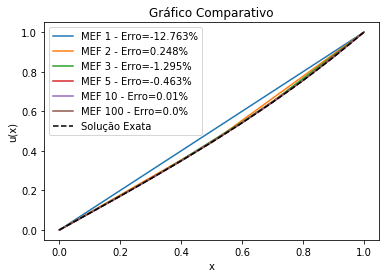

In [8]:
nel = [1,2,3,5,10,100]
amostra = 50
comp = linspace(0,1,amostra)
plt.figure(1)
plt.title('Gráfico Comparativo')
plt.xlabel('x')
plt.ylabel('u(x)')
for e in nel:
    x,u,erro = plotmef(e,amostra)
    plt.plot(x,u,label='MEF '+str(e)+' - Erro='+str(round(erro,3))+'%')
plt.plot(comp,yexata(comp),'k--',label='Solução Exata')
plt.legend()
plt.show()